In [1]:
import matplotlib.colors as colors
# load and autoreload
from IPython import get_ipython
from useful_scit.imps import (np, plt)

from sectional_v2.data_info import get_nice_name_case
from sectional_v2.util.imports import get_averaged_fields
from sectional_v2.util.imports.get_fld_fixed import get_field_fixed
from sectional_v2.util.plot.plot_levlat import plot_levlat_diff, get_cbar_eq_kwargs, make_cbar_kwargs
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders
from sectional_v2.util.naming_conventions.var_info import get_fancy_var_name, get_fancy_unit_xr


# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME/
/home/ubuntu/mnts/nird/projects/SECTIONAL_v2/sectional_v2/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from useful_scit.plot.fig_manip import subp_insert_abc

In [3]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2014-12'
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

## Cases

In [4]:
cases_sec = ['SECTv21_ctrl']
cases_orig = ['noSECTv21_default_dd', 'noSECTv21_ox_ricc_dd']
# cases_orig =['noSECTv21_ox_ricc']

cases = cases_orig + cases_sec

In [5]:
version = 'v21dd'
plot_path = get_plotpath('levlat')
filen_base = plot_path + '/_%s' % version
# print(plot_path)
make_folders(plot_path)

In [6]:
SO4_NA = 'SO4_NA'
SOA_NA = 'SOA_NA'
def get_frac(case_dic):
    for case in case_dic.keys():
        ds = case_dic[case]
        tot =ds[SO4_NA] + ds[SOA_NA]
        fSOA = ds[SOA_NA]/tot*100
        fSO4 = ds[SO4_NA]/tot*100
        case_dic[case]['fSOA'] =fSOA
        case_dic[case]['fSO4'] =fSO4
        case_dic[case]['fSOA'].attrs['units'] ='%'
        case_dic[case]['fSO4'].attrs['units'] ='%'



In [7]:
def load_and_plot_diffs(varl, case_ctrl, case_other, start_time, end_time,
                        pressure_coords=True,
                        relative=False,
                        cbar_orient='vertical',
                        asp_ratio=2, subfig_size=3,
                        ncol=None,
                        ylim=None,
                        yscale='log',
                        norm=None
                        ):
    if ylim is None:
        ylim = [1e3, 100]
    cases_dict = get_averaged_fields.get_levlat_cases(cases, varl, start_time, end_time,
                                                      pressure_adjust=pressure_coords)
    _nv = len(varl)
    if ncol is None:
        if _nv > 3:
            ncol = 2
        else:
            ncol = 1
    # noinspection PyUnresolvedReferences
    nrow = int(np.ceil(_nv / ncol))
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
    for ax, var in zip(axs.flat, varl):
        plot_levlat_diff(var, case_ctrl, case_other, cases_dict,
                         cbar_orientation=cbar_orient,
                         relative=relative,
                         ylim=ylim,
                         yscale=yscale,
                         ax=ax,
                         norm=norm)

    return axs


def load_and_plot_diffs_more_cases(varl, cases, case_oth, startyear, endyear,
                                   pressure_adjust=pressure_adjust,
                                   relative=False,
                                   cbar_orientation='vertical',
                                   asp_ratio=2, subfig_size=3,
                                   ylim=None,
                                   yscale='log',
                                   cbar_eq=True,
                                   norm=None):
    if ylim is None:
        ylim = [1e3, 100]
    imp_cases = list(set(cases).union({case_oth}))
    print(imp_cases)
    cases_dic = get_averaged_fields.get_levlat_cases(imp_cases, varl, startyear, endyear,
                                                     pressure_adjust=pressure_adjust)
    ncol = len(cases)
    nrow = len(varl)
    figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
    # noinspection PyTypeChecker
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
    for j, var in enumerate(varl):
        saxs = axs[j, :]
        levlat_more_cases_var(var, case_oth, cases, cases_dic, cbar_eq, cbar_orientation, saxs, norm, relative, ylim,
                              yscale)
    return axs


def levlat_more_cases_var(var, case_oth, cases, cases_dic, cbar_eq=True, cbar_orientation='vertical', axs=None,
                          norm=None, relative=False, ylim=None, yscale='log'):
    if ylim is None:
        ylim = [1e3, 100]
    if cbar_eq:
        cba_kwargs = get_cbar_eq_kwargs(cases, case_oth, relative, cases_dic, var)
        if norm is not None:
            del cba_kwargs['vmin']
            del cba_kwargs['vmax']
            del cba_kwargs['robust']

    else:
        cba_kwargs = None
    for i, case_ctrl in enumerate(cases):
        ax = axs[i]
        # if cbar_eq and i<len(cases)-1:
        #    cba_kwargs['add_colorbar']=False
        # else:
        #    cba_kwargs['add_colorbar']=True

        plot_levlat_diff(var, case_ctrl, case_oth, cases_dic,
                         cbar_orientation=cbar_orientation,
                         relative=relative,
                         ylim=ylim,
                         yscale=yscale,
                         ax=ax,
                         norm=norm, **cba_kwargs)

In [8]:
varlist = ['SOA_NA', 'SO4_NA']
cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
# noinspection PyTypeChecker

In [9]:
norm_dic = dict(
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=.1),
    AWNC_incld=colors.SymLogNorm(vmin=-20, vmax=20, linthresh=.1),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1)
)

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  This is separate from the ipykernel package so we can avoid doing imports until
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  after removing the cwd from sys.path.
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specif

In [ ]:
cases_dic = get_averaged_fields.get_levlat_cases(cases, varlist, startyear, endyear,
                                                 pressure_adjust=pressure_adjust)

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_NA_2008-01-2014-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM/noSECTv21_default_dd/SO4_NA_2008-01-2014-12.nc
Did not find levlat mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/SOA_NA_2008-01-2014-12.nc 


In [ ]:
get_frac(cases_dic)

In [ ]:
nrow=1
var = 'fSOA'
ncol = len(cases_ctrl)
nrow = 1#len(varlist)
subfig_size = 2.6
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]

fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
levlat_more_cases_var(var, case_oth, cases_ctrl, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=axs,
                          #norm=colors.Lin,
                          relative=True,
                          ylim=[1e3, 200],
                          yscale='log')
plt.tight_layout()

In [ ]:
nrow=1
var = 'fSOA'
ncol = len(cases_ctrl)
nrow = 1#len(varlist)
subfig_size = 2.6
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]

fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)
levlat_more_cases_var(var, case_oth, cases_ctrl, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=axs,
                          #norm=colors.Lin,
                          relative=False,
                          ylim=[1e3, 200],
                          yscale='log')
plt.tight_layout()

In [ ]:
varlist = ['H2SO4', 'SOA_LV', 'SOA_SV']#, 'AREL_incld']
varlist = ['H2SO4', 'SOA_LV', 'SOA_SV', 'SOA_NA','SO4_NA']

cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
ncol = len(cases_ctrl)
nrow = len(varlist)
subfig_size = 2.6
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
# noinspection PyTypeChecker
fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)

norm_dic = dict(
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10),# base=10),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1),# base=10),
    AWNC_incld=colors.SymLogNorm(vmin=-20, vmax=20, linthresh=1),# base=10),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1)#, base=10)
)
cases_dic = get_averaged_fields.get_levlat_cases(cases, varlist, startyear, endyear,
                                                 pressure_adjust=pressure_adjust)

for j, var in enumerate(varlist):
    saxs = axs[j, :]
    levlat_more_cases_var(var, case_oth, cases_ctrl, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=saxs,
                          #norm=norm_dic[var],
                          relative=False,
                          ylim=[1e3, 200],
                          yscale='log')
for ax in axs.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
for ax in axs[:, 0]:
    ax.set_ylabel('Pressure [hPa]')
for ax in axs[-1, :]:
    ax.set_xlabel('Latitude [$^\circ$N]')
fig.tight_layout()
fn = filen_base + f'N_GAS_{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'
plt.savefig(fn + '.pdf')
plt.savefig(fn + '.png')
plt.show()

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM/noSECTv21_default_dd/H2SO4_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_LV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_SV_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM/noSECTv21_default_dd/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM/noSECTv21_default_dd/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM/noSECTv21_ox_ricc_dd/H2SO4_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//means/levlat_means//NorESM

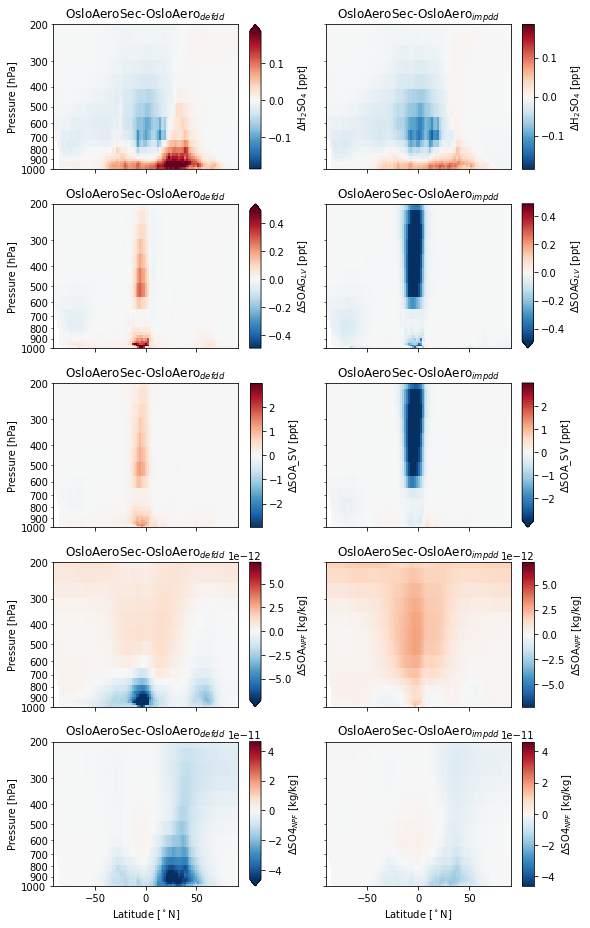

In [23]:
varlist = ['H2SO4', 'SOA_LV', 'SOA_SV']#, 'AREL_incld']
varlist = ['H2SO4', 'SOA_LV', 'SOA_SV', 'SOA_NA','SO4_NA']

cbar_orientation = 'vertical'
cases_ctrl = cases_orig
case_oth = cases_sec[0]
ncol = len(cases_ctrl)
nrow = len(varlist)
subfig_size = 2.6
asp_ratio = 1.6
figsize = [subfig_size * ncol * asp_ratio, subfig_size * nrow]
# noinspection PyTypeChecker
fig, axs = plt.subplots(nrow, ncol, figsize=figsize, sharex=True, sharey=True)


h2so4 = 'H2SO4'
soalv = 'SOA_LV'
soasv = 'SOA_SV'
soana='SOA_NA'
so4na = 'SO4_NA'

norm_dic = {
    h2so4 : colors.LogNorm(vmin=1e-2, vmax=1),# base=10),
    soalv : colors.LogNorm(vmin=1e-3, vmax=1),# base=10),
    soasv : colors.LogNorm(vmin=1e-2, vmax=10),# base=10),
    so4na : colors.LogNorm(vmin=1e-12, vmax=1e-10),#, base=10)
    soana : colors.LogNorm(vmin=1e-12, vmax=1e-10)
}
cases_dic = get_averaged_fields.get_levlat_cases(cases, varlist, startyear, endyear,
                                                 pressure_adjust=pressure_adjust)
if h2so4 in varlist or soalv in varlist:
    for case in cases:
        ds = cases_dic[case]
        for var in [h2so4, soalv, soasv]:
            if var in ds.data_vars:
                if ds[var].attrs['units'] == 'mol/mol':
                    ds[var] = ds[var]*1e12
                    ds[var].attrs['units']='ppt'


for j, var in enumerate(varlist):
    saxs = axs[j, :]
    levlat_more_cases_var(var, case_oth, cases_ctrl, cases_dic, cbar_eq=True,
                          cbar_orientation='vertical',
                          axs=saxs,
                          #norm=norm_dic[var],
                          relative=False,
                          ylim=[1e3, 200],
                          yscale='log')
for ax in axs.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
for ax in axs[:, 0]:
    ax.set_ylabel('Pressure [hPa]')
for ax in axs[-1, :]:
    ax.set_xlabel('Latitude [$^\circ$N]')
fig.tight_layout()
fn = filen_base + f'N_GAS_{case_oth}' + '_'.join(cases_ctrl) + f'{startyear}-{endyear}'
plt.savefig(fn + '.pdf')
plt.savefig(fn + '.png')
plt.show()